## **Mushroom Dataset**

#### Attributes Information

Attribute Information: (classes: edible=e, poisonous=p)

* 1. cap-shape:                bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
* 2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
* 3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* 4. bruises?:                 bruises=t,no=f
* 5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* 6. gill-attachment:          attached=a,descending=d,free=f,notched=n
* 7. gill-spacing:             close=c,crowded=w,distant=d
* 8. gill-size:                broad=b,narrow=n
* 9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* 10. stalk-shape:              enlarging=e,tapering=t
* 11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* 12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* 13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* 14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* 15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* 16. veil-type:                partial=p,universal=u
* 17. veil-color:               brown=n,orange=o,white=w,yellow=y
* 18. ring-number:              none=n,one=o,two=t
* 19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* 20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* 21. population:               abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* 22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

<font color='red'>**Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute stalk-root.**</font>

**Class Distribution:** <br>
    --    edible: 4208 (51.8%)<br>
    -- poisonous: 3916 (48.2%)<br>
    --     total: 8124 instances
    
### **KNNClassifier for Impute the Missing Values**
* We will use the KNN for impute the missing values, K-nearest neighbors (KNN) is a supervised machine learning algorithm that can also be used for imputing missing values in a dataset. KNN is a non-parametric algorithm that makes predictions based on the similarity of feature values between data points. It's a type of instance-based learning, where the algorithm stores the entire training dataset in memory and uses it during prediction.

### **Train Logistic Regression & Random Forest Model**
After Impute the missing values, we will run the two models and check the prediction.
* **Random Forest:** Random Forest is an ensemble machine learning model that combines multiple decision tree classifiers/regressors to make predictions.
* **Logistic Regression:** Logistic Regression is a statistical regression model used for binary classification tasks, where the output is a probability of belonging to a certain class.

### **PCA**
* Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis to transform a high-dimensional dataset into a lower-dimensional space while retaining important information. PCA identifies the principal components, which are linear combinations of the original features that capture the most significant variability in the data.

* PCA aims to reduce the number of features or variables in a dataset while minimizing the loss of information.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# define column names
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
                'stalk-surface-below-ring', 'stalk-color-above-ring', 
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 
                'ring-type', 'spore-print-color', 'population', 'habitat']

df = pd.read_csv("./mushrooms/agaricus-lepiota.data", header=None, names=column_names) # load a data

In [ ]:
df.head() # check first 5 rows of dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
print("Total Rows:", df.shape[0]) # check the shape of dataset
print("Total Columns:", df.shape[1])

Total Rows: 8124
Total Columns: 23


In [ ]:
print("Features: {}".format(df.columns.tolist())) # check the columns names inside the dataset

Features: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [ ]:
print("Any Duplicated Values: {}".format(df.duplicated().any())) # check duplicated values

Any Duplicated Values: False


In [ ]:
df.info() # check general information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Check for "?" in column stalk-root
df[df['stalk-root']=='?'].shape

(2480, 23)

In [ ]:
# replace '?' with np.nan in the 'stalk-root' column
df['stalk-root'] = df['stalk-root'].replace('?', np.nan)

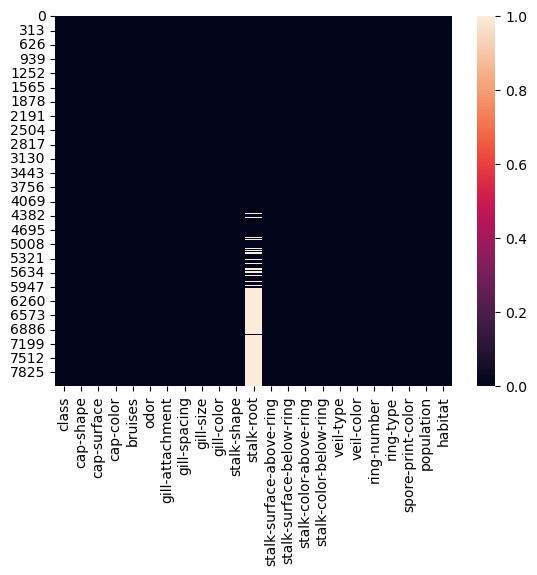

In [ ]:
# visualization of nullity of the dataset
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
df_null = df[df['stalk-root'].isna()]
null_idx = df_null.index

In [ ]:
# df = df[~(df['stalk-root'].isna())]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# one-hot-encode feature data
df1 = pd.get_dummies(df.drop('stalk-root', axis=1), columns=df.drop('stalk-root', axis=1).columns)

# label encode response data
le = LabelEncoder()
y = le.fit_transform(df['stalk-root'])
le.classes_

array(['b', 'c', 'e', 'r', nan], dtype=object)

In [ ]:
df1['target'] = y

In [ ]:
X = df1[~(df1['target']==4)]
X_missing_values = df1[df1['target']==4].drop('target', axis = 1)

In [ ]:
print("Missing value shape: ", X_missing_values.shape)
print("Without Missing value shape: ", X.shape)

Missing value shape:  (2480, 114)
Without Missing value shape:  (5644, 115)


In [ ]:
input_ = X.iloc[:,:-1]
output_ = X.iloc[:,-1]

In [ ]:
# Define a custom KNNClassifier
class KNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            distances = np.sqrt(np.sum((self.X - X_test[i]) ** 2, axis=1)) # Compute the Euclidean distances
            nearest_neighbors = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors] # Sort the distances
            nearest_labels = self.y[nearest_neighbors]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique_labels[np.argmax(counts)])
        return np.array(y_pred)

In [ ]:
knn = KNNClassifier(n_neighbors=3)
knn.fit(input_.values, output_.values)

In [ ]:
missing_values = knn.predict(X_missing_values.values)

In [ ]:
missing_values = le.inverse_transform(missing_values)

In [ ]:
pd.Series(missing_values).value_counts().to_frame().rename({0:'stalk-root'},axis = 1)

,stalk-root
b,1930
e,505
c,45


In [ ]:
X_missing_values['target'] = missing_values

In [ ]:
print("Before imputing missing values counts of each category:")
df['stalk-root'].value_counts().to_frame()

Before imputing missing values counts of each category:


,stalk-root
b,3776
e,1120
c,556
r,192


In [ ]:
# Set values in 'stalk-root' column based on indices from X_missing_values
df.loc[X_missing_values['target'].index, 'stalk-root'] = X_missing_values['target']

In [ ]:
print("After imputing missing values counts of each category:")
df['stalk-root'].value_counts().to_frame()

After imputing missing values counts of each category:


,stalk-root
b,5706
e,1625
c,601
r,192


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    ax = df_final[col].map({'e':'edible', 'p':'poisonous'}).value_counts().plot(kind = 'bar', color = ['green', 'red'])

    plt.xlabel('Score Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].map({'e':'edible', 'p':'poisonous'}).value_counts().plot.pie(explode=[0.02,0.02],autopct='%1.2f%%',shadow=True, colors = ['green', 'red'],
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.show()

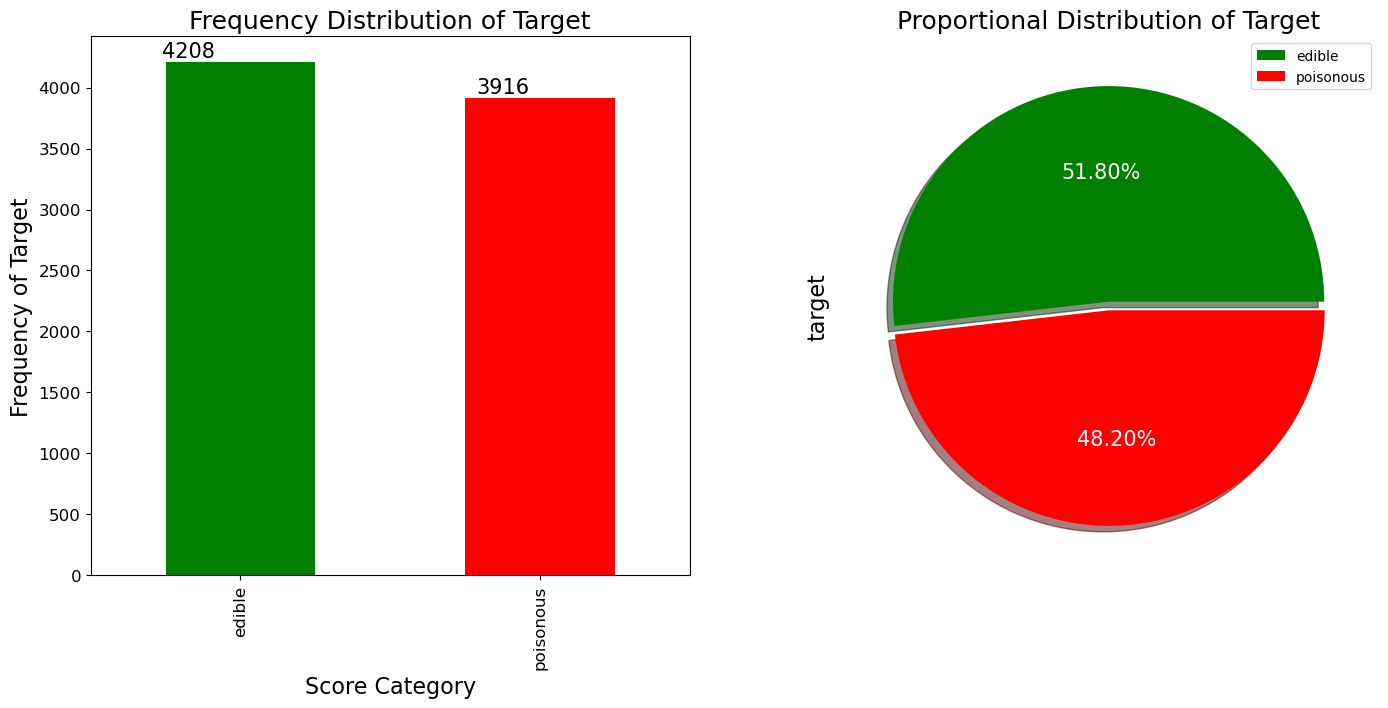

In [ ]:
target_distribution(df, 'class')

- From above, we can see the distribution of results in which our target feature is in balanced form.
- Almost 50% of each target data inside the dataset.
- Clearly, we can see that our dataset is balanced form. Therefore, accuracy evaluation is good when the dataset is in an imbalanced form, accuracy is biased on the majority class.
- We will check the different performance metrics Precision, Recall, F1-score, and Auc score on testing data and see how models perform according to these performance metrics.

<font color='green'> **Why don’t we one-hot encode the response data to train the KNN model instead?** </font>


<font color='blue'>
    
* One-Hot encoding may not be appropriate for KNN as it can introduce artificial distances and increase the dimensionality of the data, potentially leading to inaccurate results and decreased performance.

* Yes, it is possible to train a K-nearest neighbors (KNN) model with a one-hot encoded response or output variable. However, there are some considerations to keep in mind. 

    * one-hot encoding of the response data can increase the dimensionality of the data, which can lead to the curse of dimensionality. This can impact the performance and computational complexity of the KNN model, as it relies on distances in the feature space to make predictions.
</font>

In [ ]:
X = df.drop('class', axis = 1)
y = df['class']

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# one-hot-encode feature data
encoder = OneHotEncoder()
one_hot = encoder.fit_transform(X)

# Convert the sparse matrix to a dense array and create a new dataframe
one_hot_df = pd.DataFrame(one_hot.toarray(), columns=encoder.get_feature_names_out()).astype(int)

In [ ]:
one_hot_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# label encode response data
le1 = LabelEncoder()
y = le1.fit_transform(y)
le1.classes_

array(['e', 'p'], dtype=object)

In [ ]:
y[:5]

array([1, 0, 0, 1, 0])

### Split Train Test

- The purpose of this split is to allow you to train your model on one set of data and then evaluate its performance on another set of data that it hasn't seen before.

- The most common split is a 70/30 or 80/20 split, where the larger portion is used for training the model and the smaller portion is used for evaluating its performance. The training set is used to fit the model to the data, while the testing set is used to evaluate the model's performance in making predictions on new, unseen data. 
- It's important to ensure that the split is random so that the data used for training and testing is representative of the entire dataset.

In [ ]:
from sklearn.model_selection import train_test_split
import random 

In [ ]:
random.seed(42)

* By setting the random seed to a fixed value, such as random.seed(42), the same sequence of random numbers will be generated every time the code is run, allowing for reproducibility and consistency in the results.

In [ ]:
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(one_hot_df, y, test_size=0.2)

In [ ]:
# lets try to check the shape of training and testing
print("Training shape :",X_train.shape)
print("Testing shape :", X_test.shape)

Training shape : (6499, 116)
Testing shape : (1625, 116)


In [ ]:
print("In y_train: Class Distribution")
print(pd.Series(y_train).value_counts())
print()
print("In y_test: Class Distribution")
print(pd.Series(y_test).value_counts())

In y_train: Class Distribution
0    3347
1    3152
dtype: int64

In y_test: Class Distribution
0    861
1    764
dtype: int64


* From above, we can see that almost equal distribution of each class in training and testing data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report,precision_score,recall_score, f1_score
import time

### LogisticRegression

In [ ]:
lr = LogisticRegression()
# start time for model training
start_time = time.time()
%time lr.fit(X_train, y_train)
# end time for model traning
training_time = round(time.time() - start_time, 3)
print("Logistic Regression Training Time: ", training_time, 'seconds')

print()
acc = accuracy_score(lr.predict(X_test), y_test)
prec = precision_score(lr.predict(X_test), y_test)
rec = recall_score(lr.predict(X_test), y_test)
f1 = f1_score(lr.predict(X_test), y_test)

print("Logistic Regression:")
print ("\n\t\tAccuracy:: \t{:.4f}".format(acc))
print ("\t\tPrecision:: \t{:.4f}".format(prec))    
print ("\t\tRecall:: \t{:.4f}".format(rec))
print ("\t\tF1_Score:: \t{:.4f}".format(f1))
print("\n\nClassification Report:\n", classification_report(lr.predict(X_test), y_test, target_names=['edible','poisonous']))

Wall time: 94.7 ms
Logistic Regression Training Time:  0.097 seconds

Logistic Regression:

		Accuracy:: 	0.9988
		Precision:: 	0.9974
		Recall:: 	1.0000
		F1_Score:: 	0.9987


Classification Report:
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       863
   poisonous       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print("Training Accuracy: ", accuracy_score(lr.predict(X_train), y_train))
print("Testing Accuracy: ", accuracy_score(lr.predict(X_test), y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9987692307692307


* From the above, we can see the accuracy on training and testing set and its giving good score on both set.
* Therefore, our model is not overfit.

### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
# start time for model training
start_time = time.time()
%time rf.fit(X_train, y_train)
# end time for model traning
training_time1 = round(time.time() - start_time, 3)
print("Random Forest Training Time: ", training_time1, 'seconds')

print()
acc1 = accuracy_score(rf.predict(X_test), y_test)
prec1 = precision_score(rf.predict(X_test), y_test)
rec1 = recall_score(rf.predict(X_test), y_test)
f11 = f1_score(rf.predict(X_test), y_test)

print("Random Forest:")
print ("\n\t\tAccuracy:: \t{:.4f}".format(acc1))
print ("\t\tPrecision:: \t{:.4f}".format(prec1))    
print ("\t\tRecall:: \t{:.4f}".format(rec1))
print ("\t\tF1_Score:: \t{:.4f}".format(f11))
print("\n\nClassification Report:\n", classification_report(rf.predict(X_test), y_test, target_names=['edible','poisonous']))

Wall time: 524 ms
Random Forest Training Time:  0.525 seconds

Random Forest:

		Accuracy:: 	1.0000
		Precision:: 	1.0000
		Recall:: 	1.0000
		F1_Score:: 	1.0000


Classification Report:
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       861
   poisonous       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print("Training Accuracy: ", accuracy_score(rf.predict(X_train), y_train))
print("Testing Accuracy: ", accuracy_score(rf.predict(X_test), y_test))

Training Accuracy:  1.0
Testing Accuracy:  1.0


<font color='green'> **Could we train these two models by one-hot encoding the response data instead, being careful to specify that the drop parameter of the OneHotEncoder class is set to ‘first’? Why or why
not?** </font>


<font color='blue'>
    
* Yes, you can train Random Forest and Logistic Regression models using one-hot encoding for the response data, with the drop parameter of the OneHotEncoder class set to 'first'. The 'first' parameter in OneHotEncoder class indicates that the first category in each feature will be dropped during one-hot encoding.
* Using one-hot encoding with 'first' drop parameter can be useful in situations where you want to avoid multicollinearity, which is a common issue when using one-hot encoding. Multicollinearity occurs when one category of a categorical variable can be perfectly predicted from the other categories. By dropping the first category during one-hot encoding, you can prevent multicollinearity and ensure that the resulting binary features are independent of each other.

* On the other hand, one-hot encoding creates additional binary features for each category, which can increase the number of features and potentially lead to increased computational complexity. Therefore, it's important to carefully evaluate the performance and computational requirements of approache on your specific data before making a decision.
</font>

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train) # fit & transform PCA on training set
X_test_pca = pca.transform(X_test) # transform on testing set


# Get the percentage reduction in dimensions
original_dim = X_train.shape[1]
reduced_dim = pca.n_components_
percentage_reduction = ((original_dim - reduced_dim) / original_dim) * 100

print(f"Percentage reduction in dimensions: {percentage_reduction:.2f}%")
print(f"Number of features after reducing dimensionality: {reduced_dim}")

Percentage reduction in dimensions: 65.52%
Number of features after reducing dimensionality: 40


In [ ]:
lr = LogisticRegression()
# start time for model training
start_time = time.time()
%time lr.fit(X_train_pca, y_train)
# end time for model traning
training_time_pca = round(time.time() - start_time, 3)
print("Logistic Regression Training Time (PCA): ", training_time_pca, 'seconds')

print()
acc_pca = accuracy_score(lr.predict(X_test_pca), y_test)
prec_pca = precision_score(lr.predict(X_test_pca), y_test)
rec_pca = recall_score(lr.predict(X_test_pca), y_test)
f1_pca = f1_score(lr.predict(X_test_pca), y_test)

print("Logistic Regression (PCA):")
print ("\n\t\tAccuracy:: \t{:.4f}".format(acc_pca))
print ("\t\tPrecision:: \t{:.4f}".format(prec_pca))    
print ("\t\tRecall:: \t{:.4f}".format(rec_pca))
print ("\t\tF1_Score:: \t{:.4f}".format(f1_pca))
print("\n\nClassification Report:\n", classification_report(lr.predict(X_test_pca), y_test, target_names=['edible','poisonous']))

Wall time: 55.9 ms
Logistic Regression Training Time (PCA):  0.058 seconds

Logistic Regression (PCA):

		Accuracy:: 	0.9908
		Precision:: 	0.9895
		Recall:: 	0.9908
		F1_Score:: 	0.9902


Classification Report:
               precision    recall  f1-score   support

      edible       0.99      0.99      0.99       862
   poisonous       0.99      0.99      0.99       763

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
rf = RandomForestClassifier()
# start time for model training
start_time = time.time()
%time rf.fit(X_train_pca, y_train)
# end time for model traning
training_time_pca1 = round(time.time() - start_time, 3)
print("Random Forest Training Time (PCA): ", training_time_pca1, 'seconds')

print()
acc_pca1 = accuracy_score(rf.predict(X_test_pca), y_test)
prec_pca1 = precision_score(rf.predict(X_test_pca), y_test)
rec_pca1 = recall_score(rf.predict(X_test_pca), y_test)
f1_pca1 = f1_score(rf.predict(X_test_pca), y_test)

print("Random Forest (PCA):")
print ("\n\t\tAccuracy:: \t{:.4f}".format(acc_pca1))
print ("\t\tPrecision:: \t{:.4f}".format(prec_pca1))    
print ("\t\tRecall:: \t{:.4f}".format(rec_pca1))
print ("\t\tF1_Score:: \t{:.4f}".format(f1_pca1))
print("\n\nClassification Report:\n", classification_report(rf.predict(X_test_pca), y_test, target_names=['edible','poisonous']))

Wall time: 4.43 s
Random Forest Training Time (PCA):  4.43 seconds

Random Forest (PCA):

		Accuracy:: 	1.0000
		Precision:: 	1.0000
		Recall:: 	1.0000
		F1_Score:: 	1.0000


Classification Report:
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       861
   poisonous       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Item', 'Full Data', 'PCA Reduced']) # Create a dataframe to store the results

# store results of Random Forest Model
results_df = results_df.append({'Model': 'Random Forest', 'Item': 'Accuracy', 'Full Data': acc1, 'PCA Reduced': acc_pca1}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'Precision', 'Full Data': prec1, 'PCA Reduced': prec_pca1}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'Recall', 'Full Data': rec1, 'PCA Reduced': rec_pca1}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'F1Score', 'Full Data': f11, 'PCA Reduced': f1_pca1}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'Time', 'Full Data': training_time1, 'PCA Reduced': training_time_pca1}, ignore_index=True)

# store results of Logistic Regression Model
results_df = results_df.append({'Model': 'Logistic Regression', 'Item': 'Accuracy', 'Full Data': acc, 'PCA Reduced': acc_pca}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'Precision', 'Full Data': prec, 'PCA Reduced': prec_pca}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'Recall', 'Full Data': rec, 'PCA Reduced': rec_pca}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'F1Score', 'Full Data': f1, 'PCA Reduced': f1_pca}, ignore_index=True)
results_df = results_df.append({'Model': '', 'Item': 'Time', 'Full Data': training_time, 'PCA Reduced': training_time_pca}, ignore_index=True)
results_df

,Model,Item,Full Data,PCA Reduced
0,Random Forest,Accuracy,1.000000,1.000000
1,,Precision,1.000000,1.000000
2,,Recall,1.000000,1.000000
3,,F1Score,1.000000,1.000000
4,,Time,0.525000,4.430000
5,Logistic Regression,Accuracy,0.998769,0.990769
6,,Precision,0.997382,0.989529
7,,Recall,1.000000,0.990826
8,,F1Score,0.998689,0.990177
9,,Time,0.097000,0.058000


* For Logistic Regression, using PCA-reduced data resulted in slightly lower performance in terms of accuracy, precision, recall, and F1 score compared to using the full data but equal performacne for Ranfom Forest Model. However, using PCA-reduced data took more time for Random Forest and less time for Logistic Regression compared to the full data. The choice of using PCA-reduced data versus the full data depends on the trade-off between performance and computation time that is acceptable for the specific use case.